# **1. Import Library**

Pada tahap ini, kita memuat sejumlah pustaka Python yang dibutuhkan untuk mendukung seluruh proses analisis data dan pembangunan model machine learning. Masing-masing pustaka memiliki peran dan kegunaannya sendiri.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

# **2. Data Loading**

Agar dapat mengambil dataset dari Kaggle melalui Google Colab, perlu dilakukan pengaturan kredensial API Kaggle terlebih dahulu. Kaggle menyediakan API yang memungkinkan pengguna mengakses dataset secara langsung tanpa harus mengunduhnya secara manual.

Langkah ini melibatkan pengunggahan file *kaggle.json*, yang berisi informasi kredensial API dan dapat diperoleh dari halaman akun pengguna di Kaggle.

In [2]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saniskalita","key":"7866ef8cb9a7e995a8abaf1a0eede5c8"}'}

In [3]:
# Hapus folder atau file sebelumnya yang berpotensi bentrok
!rm -rf "cancer_prediction.csv" "cancer-prediction-dataset"

# Setup kredensial Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset baru dari Kaggle
!kaggle datasets download -d rabieelkharoua/cancer-prediction-dataset

# Unzip file dataset
!unzip cancer-prediction-dataset.zip

# Rename agar sesuai dengan keinginan
!mv "The_Cancer_data_1500_V2.csv" "cancer_prediction.csv"

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/cancer-prediction-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/47.3k [00:00<?, ?B/s]
100% 47.3k/47.3k [00:00<00:00, 206MB/s]
Archive:  cancer-prediction-dataset.zip
  inflating: The_Cancer_data_1500_V2.csv  


Dengan kredensial yang telah dikonfigurasi, kita dapat mengunduh dataset "Cancer Prediction Dataset" dari Kaggle menggunakan perintah `!kaggle datasets download -d rabieelkharoua/cancer-prediction-dataset`. Sebelum proses pengunduhan, folder atau file dengan nama yang sama dihapus terlebih dahulu untuk menghindari konflik.

Dataset yang diunduh berformat ZIP dan diekstrak menggunakan perintah `!unzip cancer-prediction-dataset.zip`, sehingga file CSV di dalamnya dapat diakses. Selanjutnya, file CSV yang bernama *The\_Cancer\_data\_1500\_V2.csv* diubah namanya menjadi *cancer\_prediction.csv* agar lebih mudah digunakan dalam proses selanjutnya, seperti pemuatan data ke dalam variabel DataFrame.

In [4]:
!ls

cancer_prediction.csv  cancer-prediction-dataset.zip  kaggle.json  sample_data


Perintah `!ls` menampilkan file yang tersedia di direktori kerja, yaitu `cancer_prediction.csv`, `cancer-prediction-dataset.zip`, `kaggle.json`, dan folder `sample_data`. Ini menandakan bahwa proses pengunduhan, ekstraksi, dan konfigurasi kredensial API Kaggle telah berhasil dilakukan.

In [5]:
# Membaca dataset
df = pd.read_csv("cancer_prediction.csv")
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


# **3. Data Understanding**

Langkah selanjutnya adalah memeriksa struktur dan informasi umum dari dataset. Pertama, ditampilkan jumlah baris dan kolom menggunakan atribut `.shape`, kemudian digunakan fungsi `df.info()` untuk melihat tipe data pada setiap kolom serta jumlah nilai non-null di masing-masing kolom.

In [6]:
# Melihat jumlah baris dan kolom
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Melihat tipe data pada setiap kolom
df.info()

Jumlah baris: 1500
Jumlah kolom: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


Hasil dari `df.info()` menunjukkan bahwa dataset ini terdiri dari 1500 baris dan 9 kolom. Berikut adalah penjelasan masing-masing kolom:

* **Age**: Nilai integer yang mewakili usia pasien, berkisar antara 20 hingga 80 tahun.
* **Gender**: Nilai biner yang mewakili jenis kelamin, di mana 0 berarti Laki-laki dan 1 berarti Perempuan.
* **BMI**: Nilai kontinu yang mewakili Indeks Massa Tubuh (BMI), berkisar antara 15 hingga 40.
* **Smoking**: Nilai biner yang menunjukkan status merokok, di mana 0 berarti Tidak Merokok dan 1 berarti Merokok.
* **GeneticRisk**: Nilai kategori yang menunjukkan tingkat risiko genetik untuk kanker, dengan 0 berarti Risiko Rendah, 1 berarti Risiko Sedang, dan 2 berarti Risiko Tinggi.
* **PhysicalActivity**: Nilai kontinu yang menunjukkan jumlah jam per minggu yang dihabiskan untuk aktivitas fisik, berkisar antara 0 hingga 10 jam.
* **AlcoholIntake**: Nilai kontinu yang menunjukkan jumlah unit alkohol yang dikonsumsi per minggu, berkisar antara 0 hingga 5 unit.
* **CancerHistory**: Nilai biner yang menunjukkan apakah pasien memiliki riwayat kanker, di mana 0 berarti Tidak, dan 1 berarti Ya.
* **Diagnosis**: Nilai biner yang menunjukkan status diagnosis kanker, di mana 0 berarti Tidak Kanker dan 1 berarti Kanker.

Semua kolom dalam dataset ini bertipe numerik, dengan tipe data `int64` untuk beberapa kolom seperti Age, Gender, Smoking, GeneticRisk, CancerHistory, dan Diagnosis, sementara kolom BMI, PhysicalActivity, dan AlcoholIntake bertipe data `float64`. Karena semua fitur bersifat numerik, tidak diperlukan encoding untuk tahap pelatihan.

Selanjutnya, kita akan memeriksa apakah terdapat data yang missing value atau tidak pada dataset.

In [7]:
# Memeriksa missing value
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
AlcoholIntake,0
CancerHistory,0
Diagnosis,0


Tidak ada missing value untuk setiap kolom sehingga tidak diperlukan penanganan missing value.

Setelah itu, kita periksa apakah ada data yang duplikat.

In [8]:
# Memeriksa duplikasi data
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 0


Hasil pemeriksaan menunjukkan bahwa tidak ada baris duplikat dalam dataset, dengan jumlah baris duplikat adalah 0. Selanjutnya, kita akan melanjutkan dengan memeriksa deskripsi statistik dari data menggunakan fungsi describe().

In [9]:
# Menampilkan statistik deskriptif untuk kolom numerik dalam DataFrame.
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


Kolom **Gender** dan **Diagnosis** memiliki distribusi yang cukup seimbang, dengan nilai rata-rata mendekati 0.5 untuk keduanya. Sementara itu, kolom numerik seperti **Age**, **BMI**, **PhysicalActivity**, dan **AlcoholIntake** menunjukkan variasi yang cukup besar. Variasi yang besar pada kolom numerik ini, seperti **Age** yang berkisar antara 20 hingga 80 tahun, dan **BMI** antara 15 hingga 40, adalah hal yang wajar mengingat perbedaan kondisi antara individu yang memiliki karakteristik fisik dan kebiasaan yang berbeda.

# **4. Exploratory Data Analysis**

Pada tahap **Exploratory Data Analysis (EDA)**, dilakukan analisis awal untuk memahami karakteristik umum dari dataset yang digunakan. Tujuan utama EDA adalah untuk mengetahui distribusi data, hubungan antar variabel, mendeteksi adanya nilai pencilan (outlier), serta mengevaluasi keseimbangan kelas dalam variabel target. Melalui EDA, kita dapat memperoleh wawasan penting yang akan membantu pada tahap preprocessing dan pemodelan, serta memastikan kualitas data yang digunakan dalam proses machine learning.

###**4.1 Visualisasi Data Kolom Numerik**

Pada tahap ini, histogram digunakan untuk menggambarkan distribusi data dari setiap kolom numerik dalam dataset. Visualisasi ini membantu untuk melihat pola data, distribusi, dan adanya nilai pencilan (outlier).

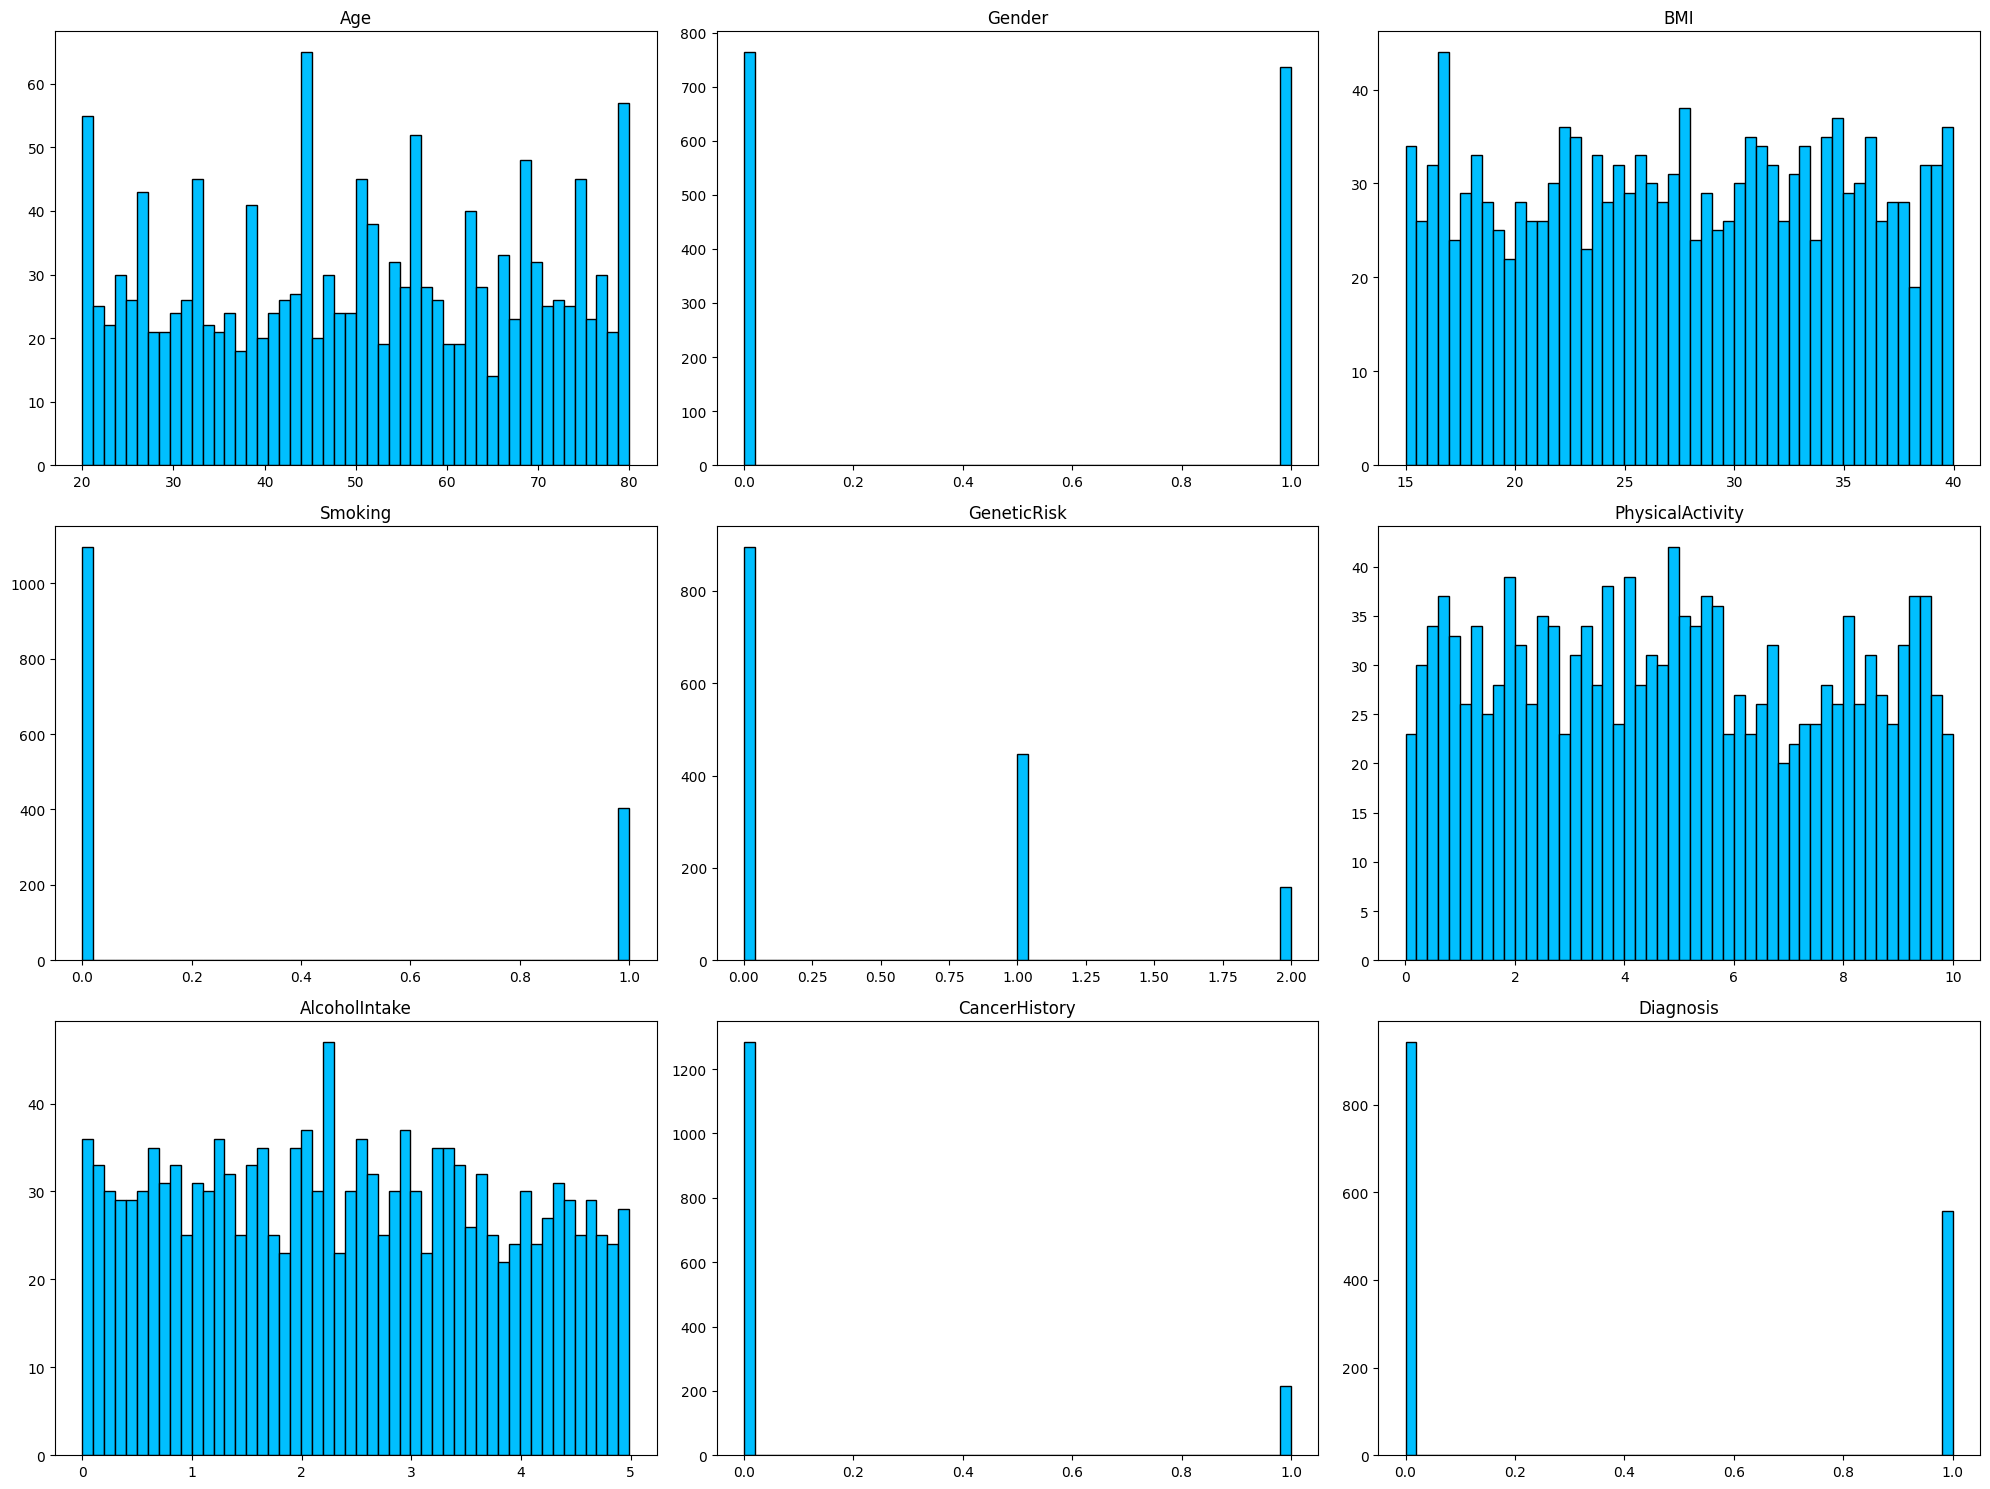

In [10]:
import matplotlib.pyplot as plt

# Menampilkan histogram untuk setiap kolom numerik dalam DataFrame
ax = df.hist(
    bins=50,
    figsize=(20, 15),
    color='#00BFFF',
    edgecolor='black',
    grid=False
)

# Menampilkan hasil visualisasi
plt.tight_layout()
plt.show()

Histogram menggambarkan distribusi masing-masing fitur numerik dalam dataset. Dengan visualisasi ini, kita dapat mengidentifikasi apakah data berdistribusi normal, adanya skewness, serta sebaran nilai pada setiap fitur.

###**4.2 Visualisasi Distribusi Kelas**

Pada tahap ini, pie chart digunakan untuk menggambarkan distribusi jumlah pasien dengan diagnosis kanker (Cancer) dan tanpa kanker (Non-Cancer), sehingga kita dapat melihat proporsi masing-masing kategori dalam dataset.

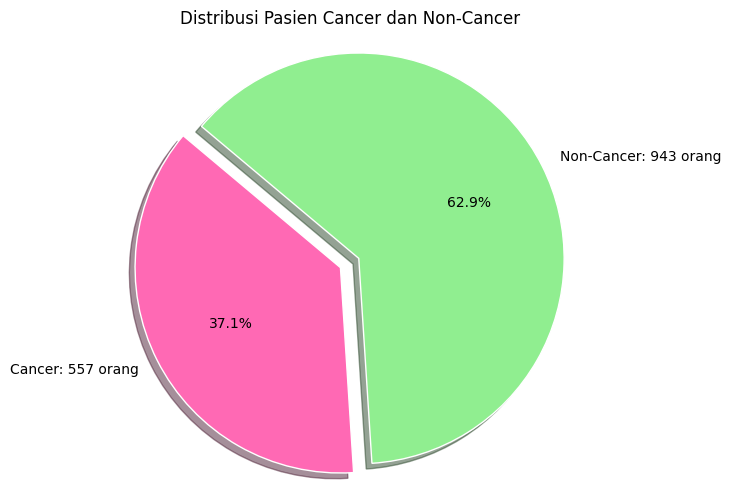

In [11]:
import matplotlib.pyplot as plt

# Memisahkan pasien berdasarkan status diagnosis kanker.
patients_with_cancer = df[df['Diagnosis'] == 1]
patients_without_cancer = df[df['Diagnosis'] == 0]

# Menghitung jumlah pasien dalam masing-masing kategori.
cancer_count = len(patients_with_cancer)
non_cancer_count = len(patients_without_cancer)

# Menentukan label, ukuran, warna, dan pengaturan pie chart.
labels = [f'Cancer: {cancer_count} orang', f'Non-Cancer: {non_cancer_count} orang']
sizes = [cancer_count, non_cancer_count]
colors = ['#FF69B4', '#90EE90']  # Pink untuk Cancer, Ijo Muda untuk Non-Cancer.
explode = (0.1, 0)
# Membuat pie chart.
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,
        wedgeprops={'edgecolor': 'white'})
plt.axis('equal')  # Menjaga agar pie chart berbentuk lingkaran.
plt.title('Distribusi Pasien Cancer dan Non-Cancer')
plt.show()

Di dapatkan hasil di mana Pie chart menggambarkan proporsi pasien dengan **cancer (warna pink, 557 orang atau 37.1%)** dan **non-cancer (warna hijau muda, 943 orang atau 62.9%)**. Visualisasi ini memberikan gambaran tentang seberapa seimbang atau tidak distribusi data pada variabel target.

###**4.3 Analisis Distribusi dan Statistik Deskriptif**

Pada tahap ini, dilakukan pengelompokan data berdasarkan variabel target (Diagnosis) dan atribut lainnya (Gender), serta perhitungan statistik seperti rata-rata untuk variabel lain (misalnya umur pada pasien dengan kanker). Analisis semacam ini memberikan wawasan lebih dalam mengenai pola dan karakteristik data yang ada.

In [12]:
# Kelompokkan pasien berdasarkan Diagnosis dan Gender
gender_distribution = df.groupby(['Diagnosis', 'Gender']).size().reset_index(name='Jumlah')

# Mapping label diagnosis dan gender agar lebih informatif
diagnosis_map = {0: 'Non-Cancer', 1: 'Cancer'}
gender_map = {0: 'Laki-laki', 1: 'Perempuan'}

gender_distribution['Diagnosis'] = gender_distribution['Diagnosis'].map(diagnosis_map)
gender_distribution['Gender'] = gender_distribution['Gender'].map(gender_map)

display (gender_distribution)

# Hitung rata-rata umur pasien yang terkena kanker
rata2_umur_cancer = df[df['Diagnosis'] == 1]['Age'].mean()
print(f"\nRata-rata umur pasien yang terkena kanker: {rata2_umur_cancer:.2f} tahun")

,Diagnosis,Gender,Jumlah
0,Non-Cancer,Laki-laki,571
1,Non-Cancer,Perempuan,372
2,Cancer,Laki-laki,193
3,Cancer,Perempuan,364



Rata-rata umur pasien yang terkena kanker: 54.83 tahun


hasil analisis distribusi pasien berdasarkan diagnosis kanker dan jenis kelamin, serta perhitungan rata-rata umur pasien yang terdiagnosis kanker:

**1. Distribusi Pasien Berdasarkan Diagnosis dan Gender:**
  * Terdapat 571 pasien laki-laki yang tidak menderita kanker (Non-Cancer) dan 372 pasien perempuan yang tidak menderita kanker.
  * Untuk pasien dengan diagnosis kanker (Cancer), terdapat 193 pasien laki-laki dan 364 pasien perempuan.
  * Ini menunjukkan bahwa proporsi pasien kanker lebih banyak ditemukan pada perempuan, dengan total 557 pasien kanker dibandingkan dengan 943 pasien non-kanker.

**2. Rata-rata Umur Pasien yang Terkena Kanker:**
  * Rata-rata umur pasien yang terdiagnosis kanker adalah 54.83 tahun. Hal ini menunjukkan bahwa mayoritas pasien kanker berada pada rentang usia dewasa hingga lanjut usia.

Distribusi ini memberikan gambaran mengenai persebaran pasien berdasarkan jenis kelamin dan diagnosis, serta memberikan wawasan lebih lanjut mengenai kelompok umur yang lebih rentan terhadap kanker dalam dataset ini.

###**4.4 Visualisasi Distribusi Fitur**

Menganalisis hubungan antara fitur-fitur terhadap fitur target (Diagnosis)

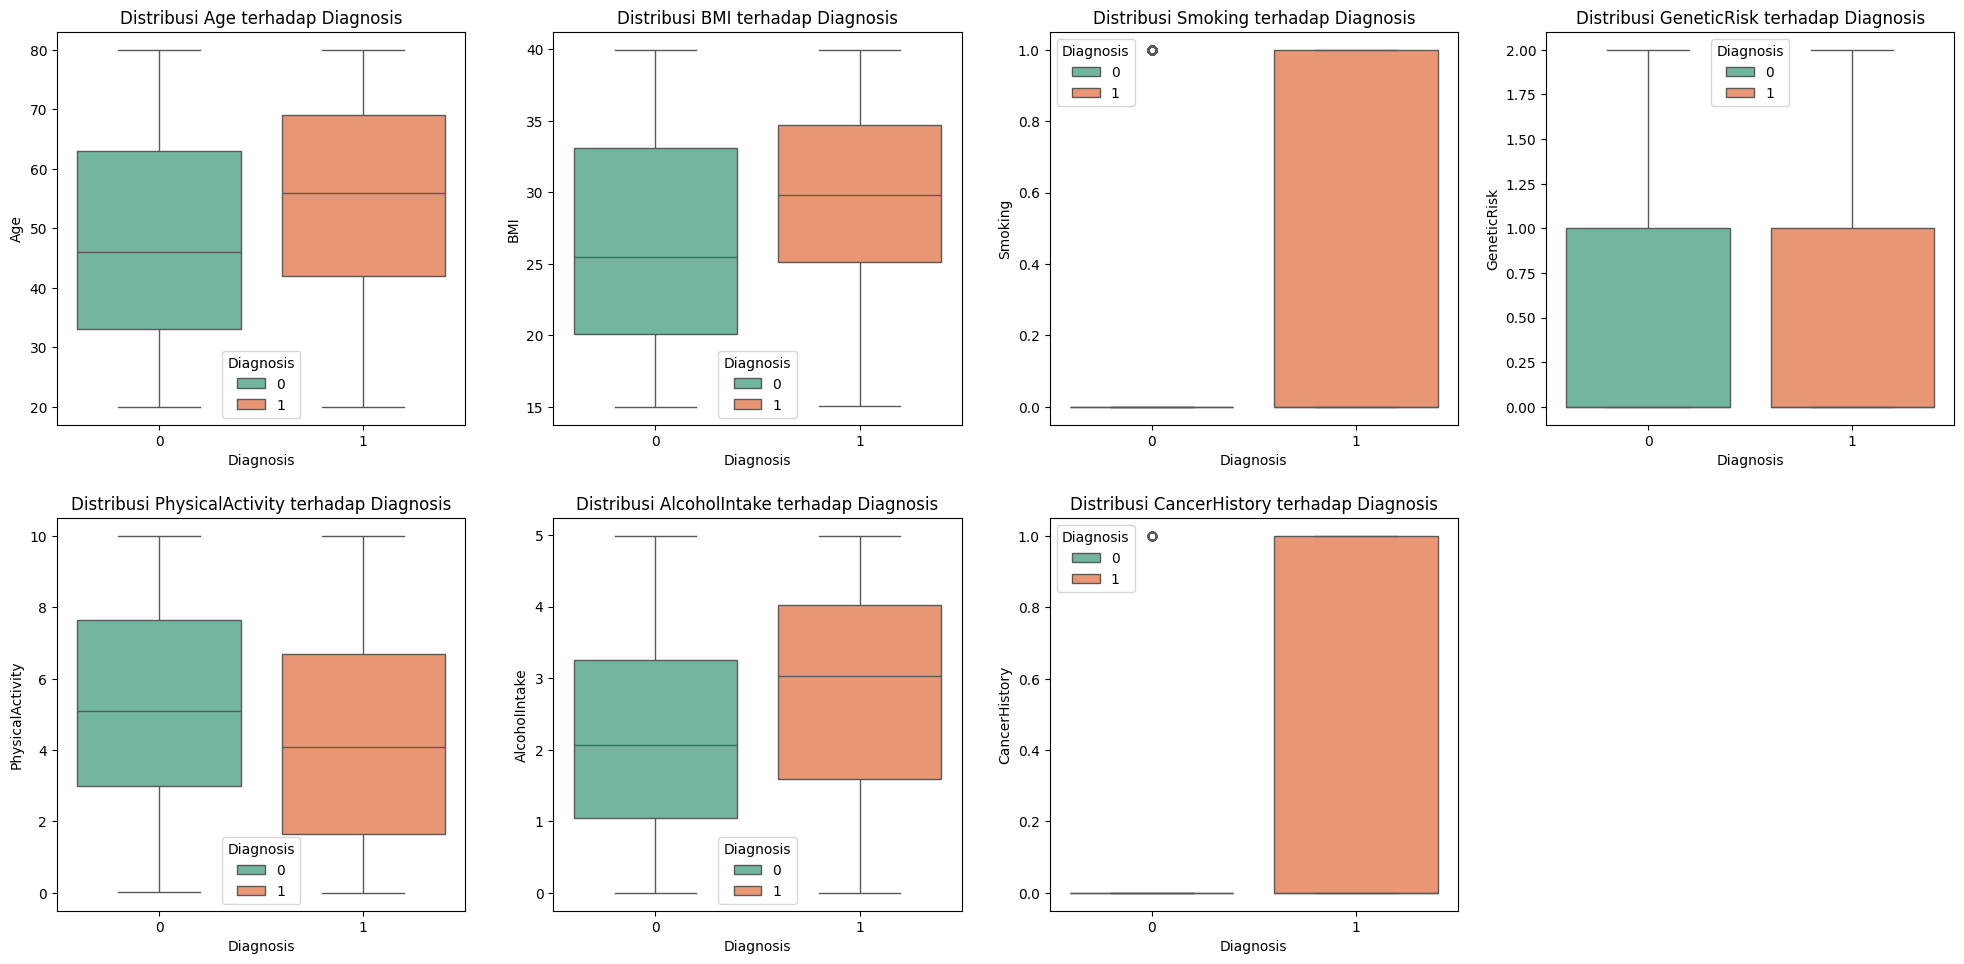

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur numerik
numeric_features = ['Age', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'AlcoholIntake', 'CancerHistory']
n_features = len(numeric_features)

# Ukuran subplot grid
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols  # hitung jumlah baris yang dibutuhkan

# Buat subplot grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten agar mudah dipakai

# Looping untuk buat boxplot per fitur
for i, feature in enumerate(numeric_features):
    sns.boxplot(data=df, x='Diagnosis', y=feature, hue='Diagnosis', ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribusi {feature} terhadap Diagnosis')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(feature)
    axes[i].legend(title='Diagnosis')

# Hapus sumbu kosong jika jumlah fitur < jumlah subplot
for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2)
plt.show()

Berdasarkan visualisasi, fitur-fitur seperti Smoking, CancerHistory, Age, PhysicalActivity, dan AlcoholIntake menunjukkan pengaruh yang kuat terhadap status Diagnosis kanker. Fitur GeneticRisk dan BMI juga memberikan kontribusi, namun tidak sekuat fitur lainnya.

###**4.5 Analisis Korelasi**

Heatmap korelasi menggambarkan hubungan linear antara variabel numerik. Nilai yang mendekati +1 atau -1 menunjukkan korelasi yang kuat, sementara nilai yang mendekati 0 menunjukkan tidak adanya korelasi. Ini sangat berguna dalam pemilihan fitur dan untuk memahami masalah multikolinearitas.

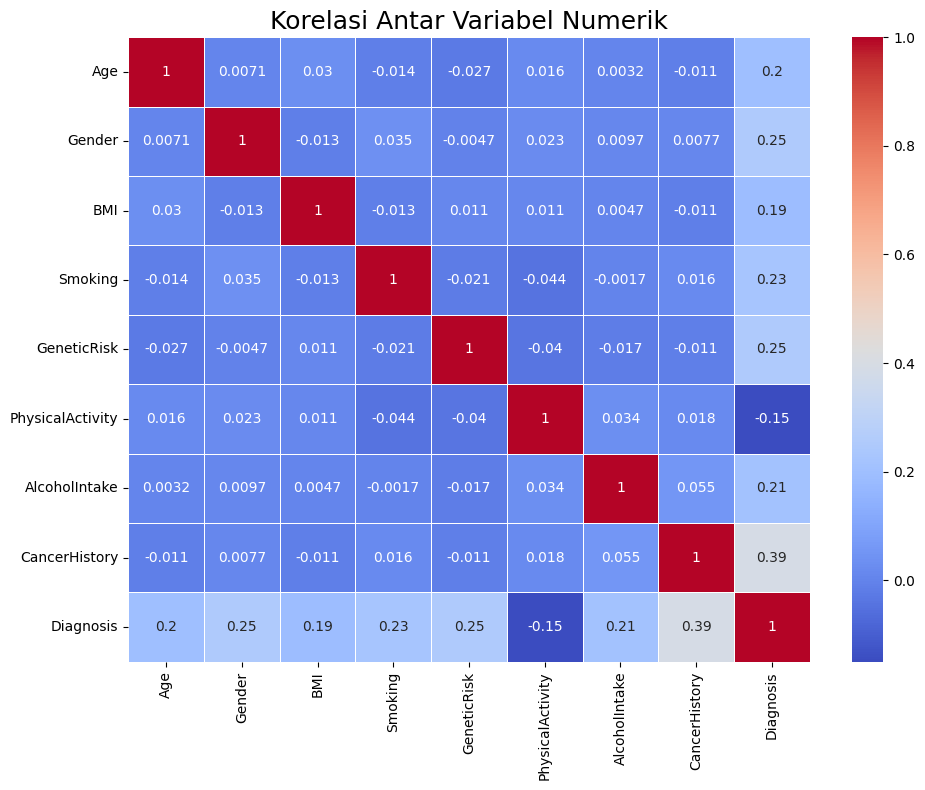

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat figure dengan ukuran tertentu
fig, ax = plt.subplots(figsize=(10, 8))

# Hitung korelasi antar kolom numerik
matrix_korelasi = df.select_dtypes(include='number').corr()

# Plot heatmap dari matriks korelasi
sns.heatmap(matrix_korelasi, annot=True, cmap='coolwarm', linecolor='white', linewidths=0.5, ax=ax)

# Tambahkan judul ke heatmap
ax.set_title("Korelasi Antar Variabel Numerik", fontsize=18)

# Tampilkan plot
plt.tight_layout()
plt.show()

Dari analisis korelasi ini, fitur-fitur seperti **CancerHistory, Gender, Smoking, GeneticRisk, Age,** dan **AlcoholIntake** menjadi kandidat kuat untuk dijadikan **predictor utama** dalam model klasifikasi. Sementara itu, **PhysicalActivity** juga penting karena memiliki arah korelasi negatif yang unik.


###**4.6 Deteksi dan Penanganan Outlier**

Jumlah outlier per kolom (sebelum penanganan):
Age                   0
Gender                0
BMI                   0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
AlcoholIntake         0
CancerHistory       216
Diagnosis             0
dtype: int64


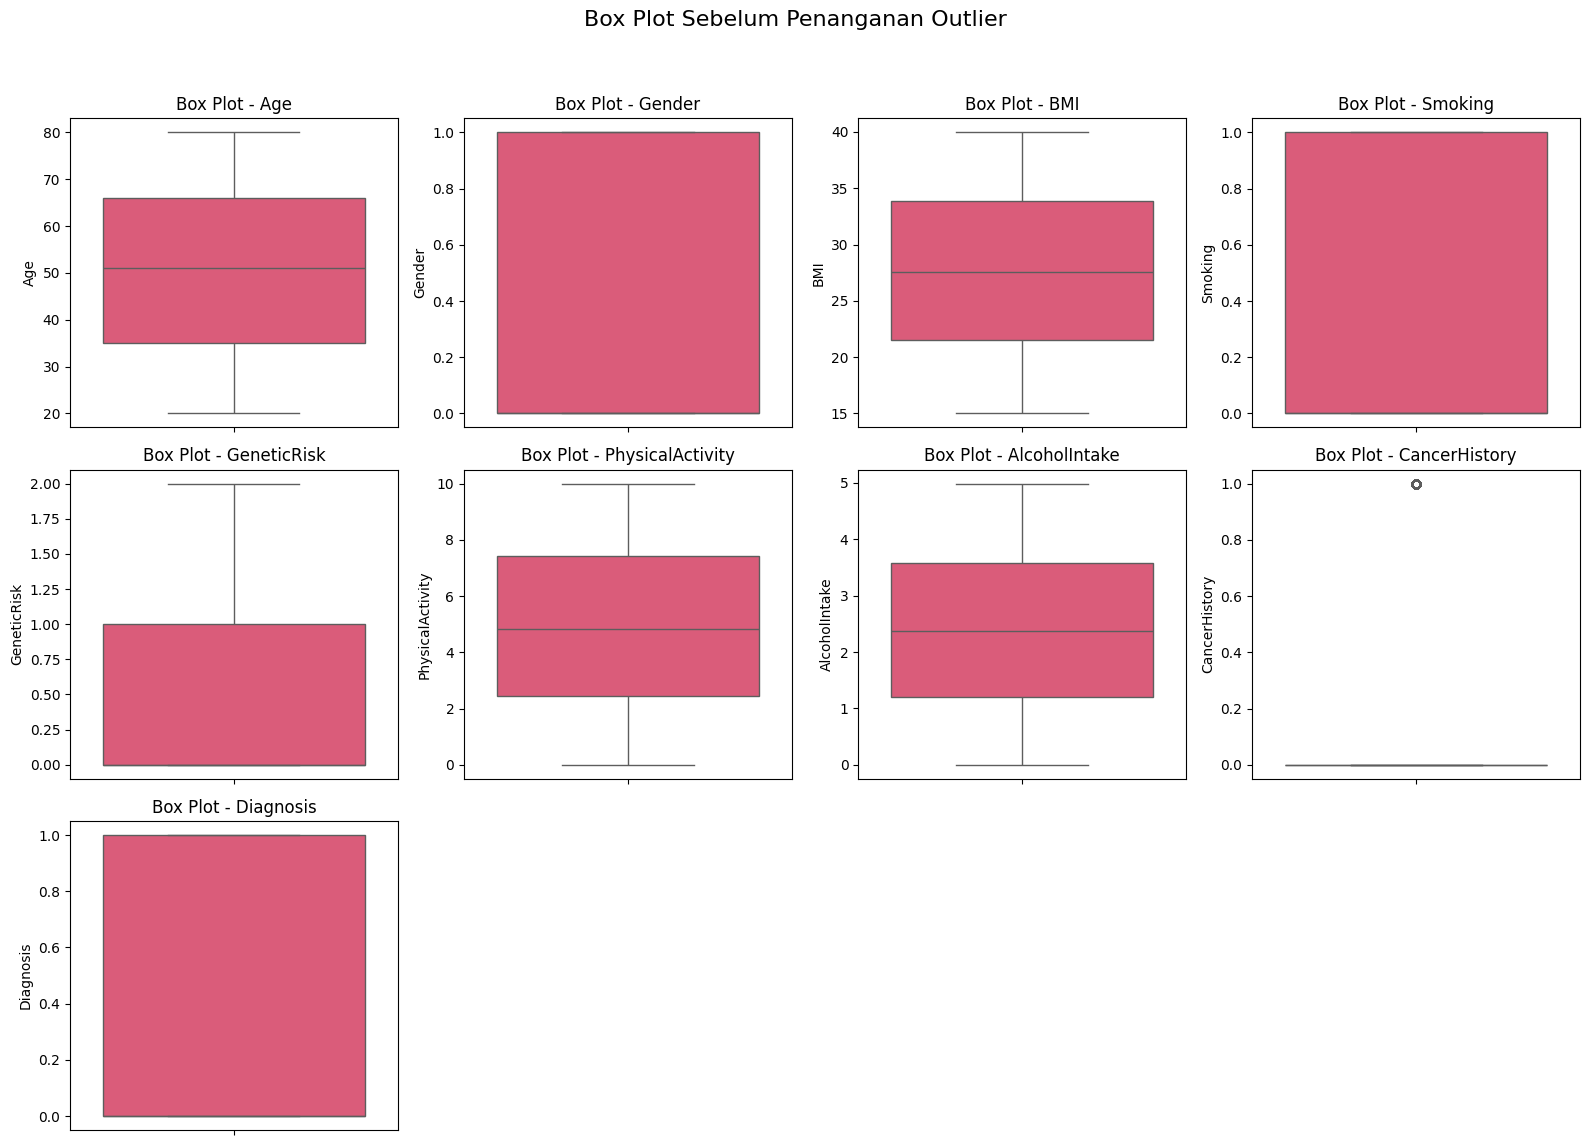


Jumlah outlier per kolom (setelah penanganan):
Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64


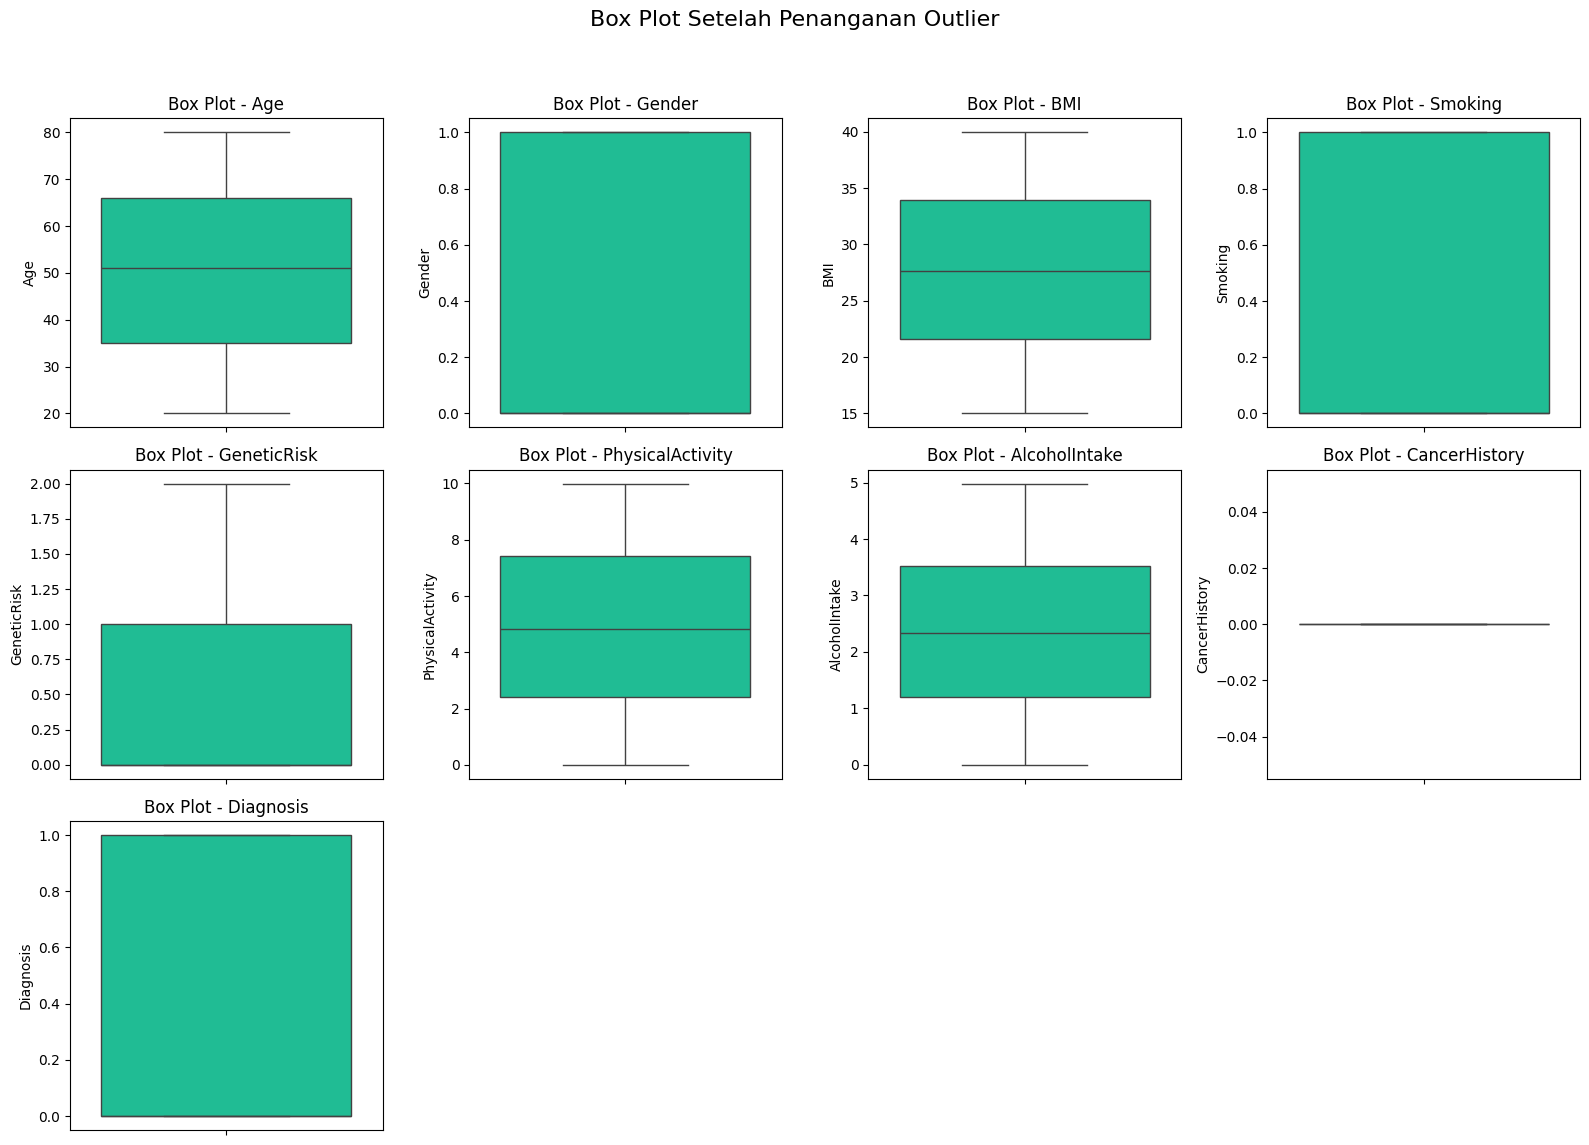

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def hitung_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outliers.sum()

def visualisasi_boxplot(df, title, color):
    num_cols = len(df.columns)
    num_rows = (num_cols + 3) // 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))
    plt.suptitle(title, fontsize=16)

    for i, column in enumerate(df.columns):
        row = i // 4
        col = i % 4
        sns.boxplot(y=df[column], ax=axes[row, col], color=color)
        axes[row, col].set_title(f"Box Plot - {column}")

    for i in range(num_cols, num_rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Hitung dan tampilkan jumlah outlier sebelum penanganan
outlier_sebelum = hitung_outlier(df)
print("Jumlah outlier per kolom (sebelum penanganan):")
print(outlier_sebelum)

# Visualisasi sebelum penanganan outlier
visualisasi_boxplot(df, "Box Plot Sebelum Penanganan Outlier", '#EF476F')

# Penanganan outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Hitung dan tampilkan jumlah outlier setelah penanganan
outlier_sesudah = hitung_outlier(df)
print("\nJumlah outlier per kolom (setelah penanganan):")
print(outlier_sesudah)

# Visualisasi setelah penanganan outlier
visualisasi_boxplot(df, "Box Plot Setelah Penanganan Outlier", '#06D6A0')

Visualisasi boxplot digunakan untuk mendeteksi keberadaan outlier dalam setiap fitur. Outlier ini kemudian ditangani menggunakan metode Interquartile Range (IQR). Setelah pembersihan, boxplot menunjukkan distribusi data yang lebih rapi dan bebas dari nilai ekstrem, memberikan gambaran yang lebih akurat tentang sebaran data. Sebelum penanganan, ditemukan bahwa kolom 'CancerHistory' memiliki 216 outlier. Setelah penerapan metode IQR, semua outlier berhasil dihilangkan, termasuk pada kolom 'CancerHistory', yang sekarang tidak lagi mengandung nilai ekstrem.

# **5. Data Preparation**

### **5.1 Split Dataset**

Karena seluruh fitur dalam dataset bersifat numerik, maka proses encoding tidak diperlukan.

Tahap berikutnya adalah membagi dataset menjadi data pelatihan (train) dan data pengujian (test).

In [16]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan label
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Bagi menjadi train dan test (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Menampilkan jumlah data pada masing-masing set
print("Jumlah data pada X_train:", X_train.shape[0])
print("Jumlah data pada X_test:", X_test.shape[0])
print("Jumlah data pada y_train:", y_train.shape[0])
print("Jumlah data pada y_test:", y_test.shape[0])

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan distribusi label
print("\nDistribusi kelas pada data pelatihan:\n", y_train.value_counts())
print("\nDistribusi kelas pada data uji:\n", y_test.value_counts())

Jumlah data pada X_train: 1027
Jumlah data pada X_test: 257
Jumlah data pada y_train: 1027
Jumlah data pada y_test: 257

Distribusi kelas pada data pelatihan:
 Diagnosis
0    725
1    302
Name: count, dtype: int64

Distribusi kelas pada data uji:
 Diagnosis
0    182
1     75
Name: count, dtype: int64


Data telah dibagi menjadi dua bagian: data pelatihan dan data pengujian, dengan proporsi 80% untuk pelatihan dan 20% untuk pengujian. Jumlah data dalam set pelatihan adalah 1.027, sedangkan set pengujian terdiri dari 257 data, memastikan bahwa proporsi pembagian tetap seimbang.

Distribusi kelas pada data pelatihan menunjukkan terdapat 725 individu yang tidak terdiagnosis kanker (Diagnosis = 0) dan 302 individu yang terdiagnosis kanker (Diagnosis = 1). Sementara itu, pada data pengujian terdapat 182 individu tanpa diagnosis kanker dan 75 individu dengan diagnosis kanker.

### **5.2 Penanganan Imbalance Class**

Saat proses splitting data, ditemukan bahwa distribusi kelas pada data pelatihan tidak seimbang untuk variabel diagnosis. Oleh karena itu, dilakukan penyeimbangan kelas dengan menerapkan teknik SMOTE (Synthetic Minority Over-sampling Technique).

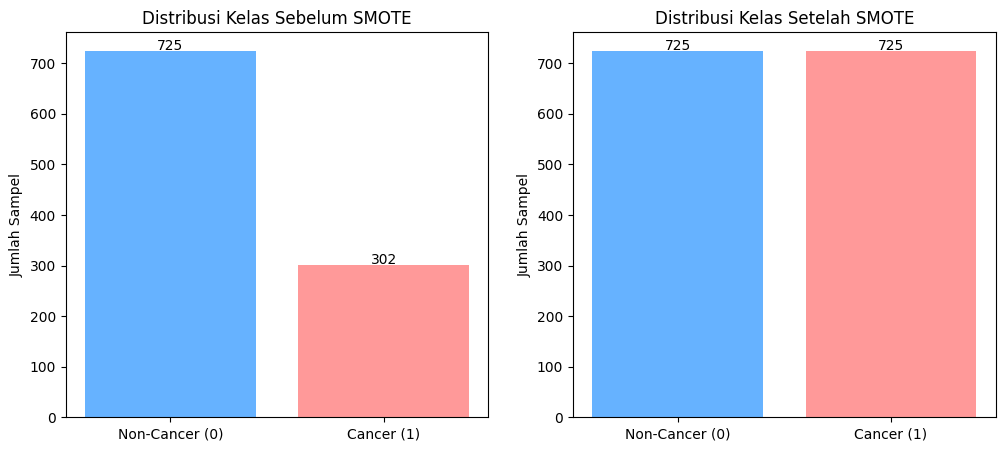

In [17]:
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE hanya ke data pelatihan
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Buat plot
plt.figure(figsize=(12, 5))

# Sebelum SMOTE
plt.subplot(1, 2, 1)
counts_before = y_train.value_counts()
bars = plt.bar(['Non-Cancer (0)', 'Cancer (1)'], counts_before.values, color=['#66B2FF', '#FF9999'])
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.ylabel('Jumlah Sampel')

# Tambahkan label jumlah di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), ha='center', fontsize=10)

# Sesudah SMOTE
plt.subplot(1, 2, 2)
counts_after = Counter(y_train_resampled)
bars = plt.bar(['Non-Cancer (0)', 'Cancer (1)'], counts_after.values(), color=['#66B2FF', '#FF9999'])
plt.title('Distribusi Kelas Setelah SMOTE')
plt.ylabel('Jumlah Sampel')

# Tambahkan label jumlah di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), ha='center', fontsize=10)

Setelah dilakukan SMOTE, dapat terlihat data variabel diagnosis yaitu antara non-cancer dan cancer menjadi seimbang.

### **5.3 Standarisasi**

Pada tahap ini, dilakukan proses standardisasi terhadap data hasil oversampling (X\_train\_resampled) menggunakan *StandardScaler*. Tujuannya adalah untuk menyamakan skala antar fitur, sehingga setiap fitur memiliki nilai rata-rata 0 dan standar deviasi 1. Hal ini penting untuk memastikan bahwa algoritma pembelajaran mesin tidak bias terhadap fitur dengan skala lebih besar. Hasil transformasi kemudian dikonversi ke dalam bentuk DataFrame agar lebih mudah dibaca, dan ditampilkan lima baris pertama sebagai contoh.

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada data training dan testing SETELAH SMOTE
X_train_prepared = scaler.fit_transform(X_train_resampled)
X_test_prepared = scaler.transform(X_test)

# Mengonversi hasil standarisasi ke DataFrame agar lebih rapi
X_train_prepared_df = pd.DataFrame(X_train_prepared, columns=X_train.columns)

# Menampilkan 5 baris pertama dengan pembulatan 2 desimal
print("Contoh data X_train setelah standarisasi:\n")
(X_train_prepared_df.head().round(2))

Contoh data X_train setelah standarisasi:



,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,-1.58,-0.98,0.83,-0.57,0.73,-0.25,0.65,0.0
1,0.49,-0.98,1.11,1.74,-0.73,-1.44,1.33,0.0
2,-1.18,-0.98,-1.19,-0.57,-0.73,0.81,-0.07,0.0
3,-1.70,-0.98,0.98,-0.57,0.73,-0.73,1.32,0.0
4,-0.14,1.02,-0.55,1.74,0.73,1.23,-1.44,0.0


Hasil standardisasi menunjukkan bahwa seluruh fitur kini berada dalam skala yang seragam, dengan nilai-nilai yang telah disesuaikan agar memiliki rata-rata 0 dan standar deviasi 1. Sebelumnya, fitur-fitur seperti usia, BMI, atau aktivitas fisik memiliki rentang nilai yang berbeda, namun kini semua fitur telah dinormalisasi. Proses ini sangat penting, terutama untuk algoritma pembelajaran mesin yang sensitif terhadap perbedaan skala, seperti K-Nearest Neighbors (KNN). Setelah proses *data preparation* ini selesai, data sudah siap digunakan untuk membangun dan melatih model prediksi.

# **6. Pembangunan Model**

###**6.1 Membangun Model Klasifikasi**

Masing-masing algoritma klasifikasi yaitu RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, dan KNeighborsClassifier dilatih secara individual menggunakan data pelatihan. Setiap model dikonfigurasi dan dioptimalkan berdasarkan karakteristik dataset yang telah disiapkan.

In [19]:
rf = RandomForestClassifier().fit(X_train_prepared, y_train_resampled)
dt = DecisionTreeClassifier().fit(X_train_prepared, y_train_resampled)
lr = LogisticRegression().fit(X_train_prepared, y_train_resampled)
knn = KNeighborsClassifier().fit(X_train_prepared, y_train_resampled)
print("Model training selesai.")

Model training selesai.


Setelah seluruh proses pelatihan selesai, model-model tersebut siap untuk dievaluasi menggunakan data uji. Pernyataan "Model training selesai." menandakan bahwa semua model telah berhasil dilatih dan dapat dilanjutkan ke tahap pengujian.

###**6.2 Evaluasi Model Klasifikasi**

Selanjutnya dilakukan evaluasi awal terhadap kinerja model sebelum proseshyperparameter tuning dilakukan.

In [20]:
# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  # Confusion matrix

    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted'),
        'Classification Report': classification_report(y_test, y_pred)
    }

    # Plot Confusion Matrix
    plot_confusion_matrix(cm, model_name)

    return results

# Fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Evaluasi Model: Random Forest (RF)


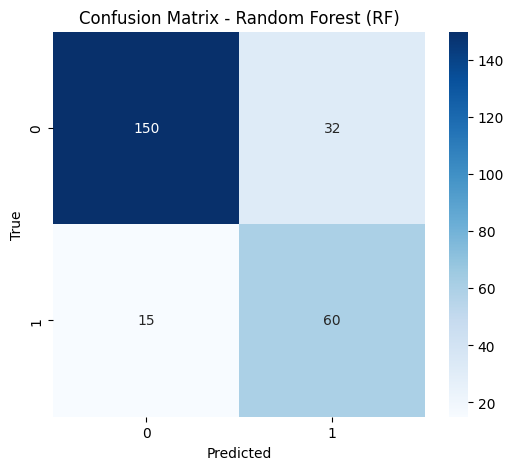

Accuracy: 0.8171
Precision: 0.8341
Recall: 0.8171
F1-Score: 0.8219

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       182
           1       0.65      0.80      0.72        75

    accuracy                           0.82       257
   macro avg       0.78      0.81      0.79       257
weighted avg       0.83      0.82      0.82       257


Evaluasi Model: Decision Tree (DT)


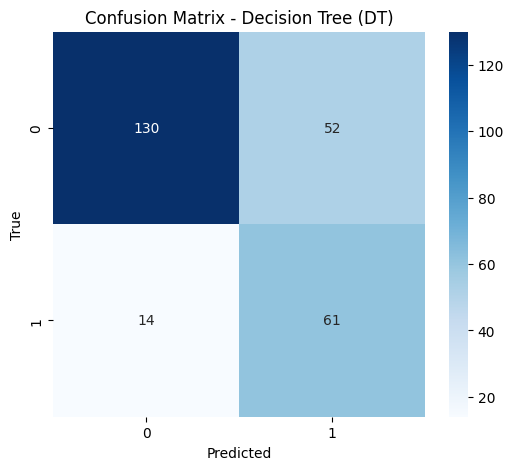

Accuracy: 0.7432
Precision: 0.7969
Recall: 0.7432
F1-Score: 0.7542

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       182
           1       0.54      0.81      0.65        75

    accuracy                           0.74       257
   macro avg       0.72      0.76      0.72       257
weighted avg       0.80      0.74      0.75       257


Evaluasi Model: Logistic Regression (LR)


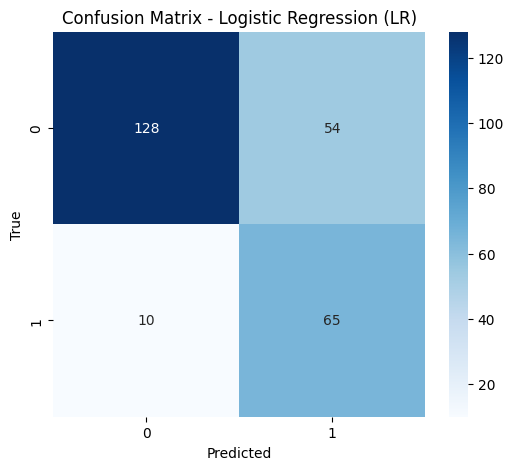

Accuracy: 0.7510
Precision: 0.8163
Recall: 0.7510
F1-Score: 0.7621

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       182
           1       0.55      0.87      0.67        75

    accuracy                           0.75       257
   macro avg       0.74      0.78      0.74       257
weighted avg       0.82      0.75      0.76       257


Evaluasi Model: K-Nearest Neighbors (KNN)


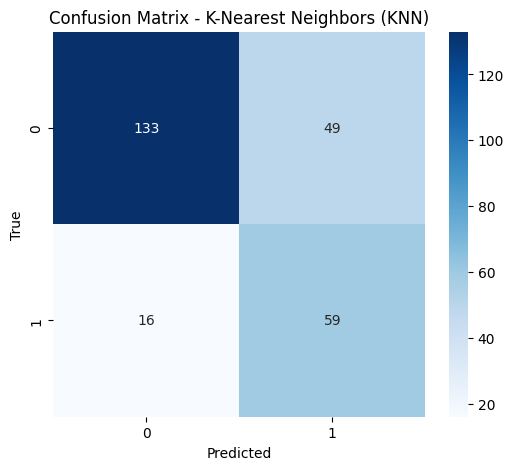

Accuracy: 0.7471
Precision: 0.7916
Recall: 0.7471
F1-Score: 0.7573

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       182
           1       0.55      0.79      0.64        75

    accuracy                           0.75       257
   macro avg       0.72      0.76      0.72       257
weighted avg       0.79      0.75      0.76       257

                       Model  Accuracy  Precision    Recall  F1-Score
0         Random Forest (RF)  0.817121   0.834115  0.817121  0.821949
1         Decision Tree (DT)  0.743191   0.796857  0.743191  0.754177
2   Logistic Regression (LR)  0.750973   0.816257  0.750973  0.762092
3  K-Nearest Neighbors (KNN)  0.747082   0.791551  0.747082  0.757278


In [21]:
# Daftar model yang akan diuji
model_list = [
    ('Random Forest (RF)', rf),
    ('Decision Tree (DT)', dt),
    ('Logistic Regression (LR)', lr),
    ('K-Nearest Neighbors (KNN)', knn)
]

# Dictionary untuk menyimpan hasil evaluasi
evaluation_results = {}

# Melakukan evaluasi terhadap setiap model
for model_label, model_instance in model_list:
    print(f"\nEvaluasi Model: {model_label}")
    # Change X_test_scaled to X_test_prepared
    eval_metrics = evaluate_model(model_instance, X_test_prepared, y_test, model_label)

    # Menyimpan hasil evaluasi ke dalam dictionary
    evaluation_results[model_label] = eval_metrics

    # Menampilkan hasil evaluasi per model
    print(f"Accuracy: {eval_metrics['Accuracy']:.4f}")
    print(f"Precision: {eval_metrics['Precision']:.4f}")
    print(f"Recall: {eval_metrics['Recall']:.4f}")
    print(f"F1-Score: {eval_metrics['F1-Score']:.4f}")
    print("\nClassification Report:")
    # Access the 'Classification Report' using its correct key
    print(classification_report(y_test, model_instance.predict(X_test_prepared), zero_division=0))
    print("=" * 60)

# Membuat DataFrame untuk menyajikan hasil evaluasi secara ringkas
evaluation_summary = pd.DataFrame([
    {
        'Model': model_label,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for model_label, metrics in evaluation_results.items()
])

# Menampilkan tabel ringkasan hasil evaluasi
print(evaluation_summary)

Berdasarkan hasil evaluasi, model **Random Forest (RF)** menunjukkan performa terbaik secara keseluruhan dengan akurasi, recall, dan F1-score tertinggi dibandingkan model lainnya. Model ini juga memberikan presisi yang unggul, menjadikannya pilihan paling optimal untuk dataset yang diuji. Di posisi berikutnya terdapat **Logistic Regression (LR)** dan **K-Nearest Neighbors (KNN)** yang memiliki performa cukup kompetitif, meskipun masih berada di bawah Random Forest. Sementara itu, **Decision Tree (DT)** mencatatkan hasil yang paling rendah di antara keempat model, meskipun perbedaannya tidak terlalu signifikan dibandingkan LR dan KNN.



###**6.3 Tunning Model Klasifikasi**

Pemanfaatan **GridSearchCV** dilakukan untuk menemukan kombinasi parameter terbaik bagi setiap model. Proses ini bertujuan mengoptimalkan performa model dengan menyaring konfigurasi hyperparameter yang paling sesuai, lalu menyimpan hasil terbaiknya untuk digunakan dalam tahap evaluasi selanjutnya.

####Random Forest

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train_prepared, y_train_resampled)

print("Best Params for Random Forest:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

Best Params for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


####Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, n_jobs=-1)
grid_dt.fit(X_train_prepared, y_train_resampled)

print("Best Params for Decision Tree:", grid_dt.best_params_)
best_dt = grid_dt.best_estimator_

Best Params for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}


####Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['liblinear', 'saga'],
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train_prepared, y_train_resampled)

print("Best Params for Logistic Regression:", grid_lr.best_params_)
best_lr = grid_lr.best_estimator_

Best Params for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


####K-Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1)
grid_knn.fit(X_train_prepared, y_train_resampled)

print("Best Params for KNN:", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_

Best Params for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


####Ringkasan Best Parameters

In [26]:
# Membuat dictionary untuk menyimpan best_params_ dari tiap model
best_params_summary = {
    'Random Forest (RF)': grid_rf.best_params_,
    'Decision Tree (DT)': grid_dt.best_params_,
    'Logistic Regression (LR)': grid_lr.best_params_,
    'K-Nearest Neighbors (KNN)': grid_knn.best_params_
}

# Menampilkan hasil ringkasan parameter terbaik
print("Best Parameter Summary for Each Model:")
for name, params in best_params_summary.items():
    print(f"\nModel: {name}")
    for key, val in params.items():
        print(f"  {key} = {val}")


Best Parameter Summary for Each Model:

Model: Random Forest (RF)
  max_depth = 20
  min_samples_split = 2
  n_estimators = 100

Model: Decision Tree (DT)
  criterion = entropy
  max_depth = 10
  min_samples_split = 2

Model: Logistic Regression (LR)
  C = 0.1
  penalty = l1
  solver = liblinear

Model: K-Nearest Neighbors (KNN)
  metric = manhattan
  n_neighbors = 7
  weights = distance


###**6.4 Evaluasi Model Klasifikasi Setelah Tunning**

Setelah menemukan kombinasi parameter yang optimal, model dievaluasi kembali untuk membandingkan performa yang diperoleh.


Evaluating: Random Forest (RF)


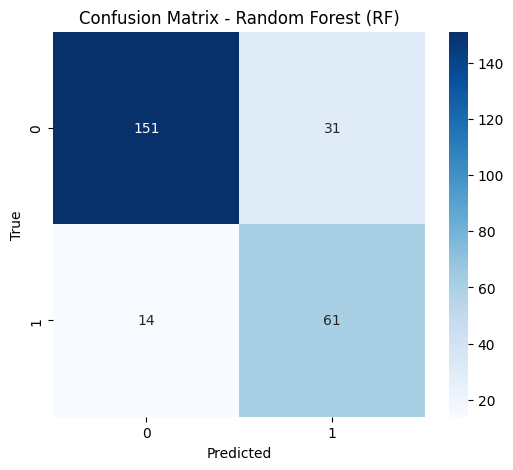

Accuracy     : 0.8249
Precision    : 0.8416
Recall       : 0.8249
F1 Score     : 0.8295

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       182
           1       0.66      0.81      0.73        75

    accuracy                           0.82       257
   macro avg       0.79      0.82      0.80       257
weighted avg       0.84      0.82      0.83       257

------------------------------------------------------------

Evaluating: Decision Tree (DT)


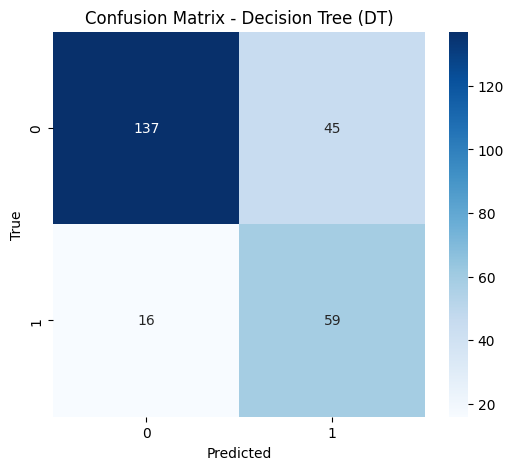

Accuracy     : 0.7626
Precision    : 0.7997
Recall       : 0.7626
F1 Score     : 0.7716

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       182
           1       0.57      0.79      0.66        75

    accuracy                           0.76       257
   macro avg       0.73      0.77      0.74       257
weighted avg       0.80      0.76      0.77       257

------------------------------------------------------------

Evaluating: Logistic Regression (LR)


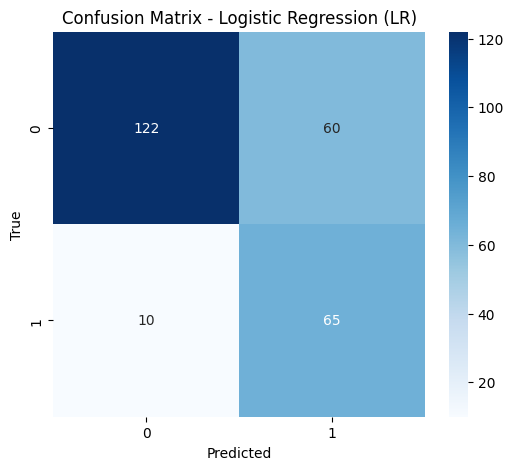

Accuracy     : 0.7276
Precision    : 0.8063
Recall       : 0.7276
F1 Score     : 0.7400

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.67      0.78       182
           1       0.52      0.87      0.65        75

    accuracy                           0.73       257
   macro avg       0.72      0.77      0.71       257
weighted avg       0.81      0.73      0.74       257

------------------------------------------------------------

Evaluating: K-Nearest Neighbors (KNN)


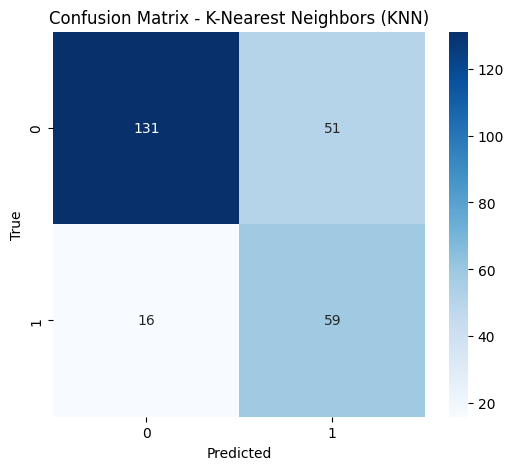

Accuracy     : 0.7393
Precision    : 0.7876
Recall       : 0.7393
F1 Score     : 0.7501

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       182
           1       0.54      0.79      0.64        75

    accuracy                           0.74       257
   macro avg       0.71      0.75      0.72       257
weighted avg       0.79      0.74      0.75       257

------------------------------------------------------------

Summary of Tuned Model Performance:
                       Model  Accuracy  Precision    Recall  F1-Score
0         Random Forest (RF)  0.824903   0.841579  0.824903  0.829526
1         Decision Tree (DT)  0.762646   0.799671  0.762646  0.771599
2   Logistic Regression (LR)  0.727626   0.806273  0.727626  0.739987
3  K-Nearest Neighbors (KNN)  0.739300   0.787618  0.739300  0.750093


In [27]:
# Daftar model hasil tuning untuk dievaluasi
tuned_models = [
    ('Random Forest (RF)', best_rf),
    ('Decision Tree (DT)', best_dt),
    ('Logistic Regression (LR)', best_lr),
    ('K-Nearest Neighbors (KNN)', best_knn)
]

# Dictionary untuk menyimpan hasil evaluasi
tuned_eval_results = {}

# Proses evaluasi untuk setiap model
for label, clf in tuned_models:
    print(f"\nEvaluating: {label}")
    # Change X_test_scaled to X_test_prepared
    metrics = evaluate_model(clf, X_test_prepared, y_test, label)
    tuned_eval_results[label] = metrics

    # Cetak hasil metrik
    print(f"Accuracy     : {metrics['Accuracy']:.4f}")
    print(f"Precision    : {metrics['Precision']:.4f}")
    print(f"Recall       : {metrics['Recall']:.4f}")
    print(f"F1 Score     : {metrics['F1-Score']:.4f}")
    print("\nClassification Report:")
    print(metrics['Classification Report'])
    print("-" * 60)

# Menyusun ringkasan hasil evaluasi ke dalam DataFrame
tuned_summary = pd.DataFrame([
    {
        'Model': name,
        'Accuracy': result['Accuracy'],
        'Precision': result['Precision'],
        'Recall': result['Recall'],
        'F1-Score': result['F1-Score']
    }
    for name, result in tuned_eval_results.items()
])

# Tampilkan tabel ringkasan evaluasi
print("\nSummary of Tuned Model Performance:")
print(tuned_summary)

###**6.5 Plot Model**

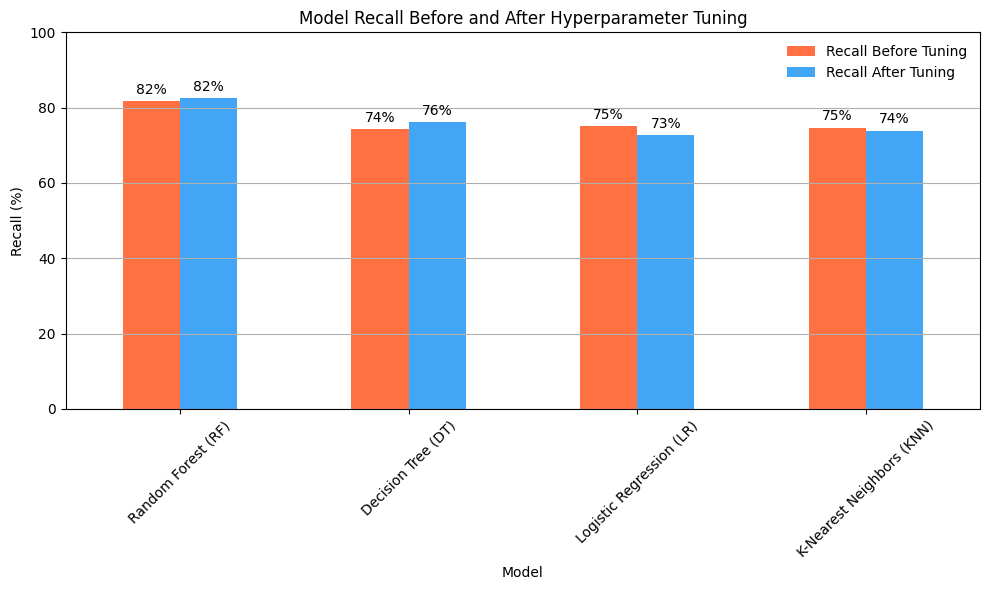

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Membuat DataFrame untuk hasil Recall dalam bentuk persen
results = {
    'Model': ['Random Forest (RF)', 'Decision Tree (DT)', 'Logistic Regression (LR)', 'K-Nearest Neighbors (KNN)'],
    'Recall Before Tuning': [evaluation_results['Random Forest (RF)']['Recall'] * 100,
                             evaluation_results['Decision Tree (DT)']['Recall'] * 100,
                             evaluation_results['Logistic Regression (LR)']['Recall'] * 100,
                             evaluation_results['K-Nearest Neighbors (KNN)']['Recall'] * 100],
    'Recall After Tuning': [tuned_eval_results['Random Forest (RF)']['Recall'] * 100,
                            tuned_eval_results['Decision Tree (DT)']['Recall'] * 100,
                            tuned_eval_results['Logistic Regression (LR)']['Recall'] * 100,
                            tuned_eval_results['K-Nearest Neighbors (KNN)']['Recall'] * 100]
}

df_results = pd.DataFrame(results)

# Plotting
ax = df_results.set_index("Model").plot(kind='bar', figsize=(10, 6), color=['#FF7043', '#42A5F5'])

# Judul dan label
plt.title("Model Recall Before and After Hyperparameter Tuning")
plt.ylabel("Recall (%)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Legend di dalam plot, sudut kanan atas
plt.legend(loc='upper right', frameon=False)  # `frameon=False` = tanpa kotak

# Menambahkan label persentase di atas batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Setelah dilakukan hyperparameter tuning, terdapat sedikit perubahan pada performa beberapa model. **Decision Tree (DT)** menunjukkan peningkatan recall dari **74% menjadi 76%**, sedangkan **K-Nearest Neighbors (KNN)** mengalami penurunan tipis dari **75% menjadi 74%**. **Logistic Regression (LR)** juga mengalami sedikit penurunan recall dari **75% menjadi 73%**. Sementara itu, **Random Forest (RF)** mempertahankan performa recall-nya di angka **82%**, baik sebelum maupun setelah tuning.

Meskipun tuning tidak memberikan peningkatan signifikan untuk semua model, **Random Forest tetap menjadi model dengan performa terbaik**, mempertahankan recall tertinggi dibandingkan model lainnya. Dalam konteks **deteksi kanker**, di mana **Recall yang tinggi sangat penting**, Random Forest menjadi pilihan yang sangat direkomendasikan. Hal ini karena kesalahan berupa **false negative** (pasien yang sebenarnya mengidap kanker tetapi tidak terdeteksi oleh model) harus diminimalkan untuk memastikan pasien menerima penanganan secepat mungkin.

**Decision Tree** yang menunjukkan perbaikan setelah tuning bisa dipertimbangkan sebagai alternatif, terutama karena sifat model ini yang mudah diinterpretasikan. **Logistic Regression** dan **K-Nearest Neighbors**, meskipun sederhana, menunjukkan penurunan recall dan oleh karena itu kurang cocok digunakan dalam konteks diagnosis medis kritikal seperti ini, kecuali jika digunakan dalam kombinasi model atau skenario dengan keterbatasan komputasi.

Secara keseluruhan, **Random Forest tetap menjadi model yang paling direkomendasikan** untuk deteksi kanker karena konsistensi performanya dan kemampuannya dalam mengidentifikasi kasus positif secara andal.